# Task 5
Write a computer program that imports an image file (the ‘object’)  and then computes the locations of the pixel coordinates that constitute a virtual image in a plane mirror.  Use this information to plot the virtual image. Use this image import and plot functionality in tasks ***5-10***. 

just need to make sure for the following tasks to:
- make the lens/mirrors the right shape
- change the formulae used for the reflected/virtual image
- make the translation intervals smaller (so that it looks smoother ig)

should also preferably optimise the below code (takes a bit to boot up...)

'stinkbug.png' not found


SystemExit: 

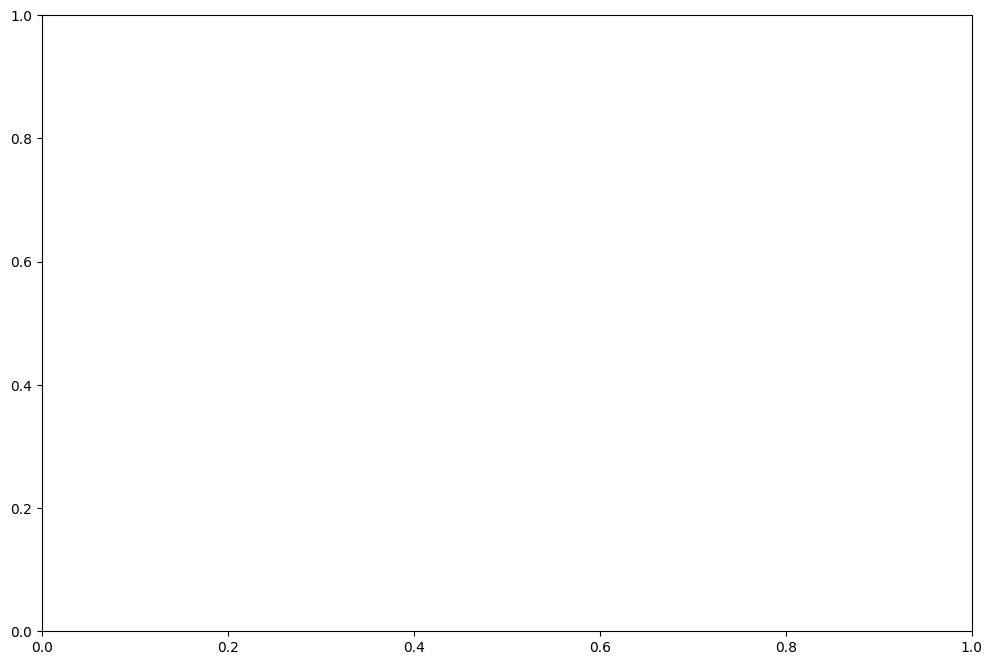

In [ ]:
'''NEW CODE'''
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, decimal
from decimal import Decimal

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
def load_img(image_path):
    """loads image file and converts it to a numpy array."""
    try:
        global img
        img = Image.open(image_path) 
        return np.array(img)
    except Exception as e:
        print(f"Error loading image: {e}")
        return None
    
def plot_mirror_reflection(orig_img):
    """ plots original and reflected image with a plane mirror """
    height, width = orig_img.shape[:2]
    global reflected_img
    reflected_img = np.fliplr(orig_img) # flips original image
    # positions for object, reflected image and mirror
    global center_x , center_y , img_height , img_width
    center_x = Decimal('0.25')
    center_y = Decimal('0.1')
    mirror_x = 0
    # scaling image up/down to fit graph
    aspect_ratio = height / width
    img_width = Decimal('0.3')
    img_height = Decimal(img_width * Decimal(aspect_ratio))
    # overall position(extent) of original (right) image
    obj_extent = [center_x - img_width/2, center_x + img_width/2, 
                     center_y, img_height + center_y]
    # overall position(extent) of reflected (left) image
    reflect_extent = [-center_x - img_width/2, -center_x + img_width/2, 
                     center_y, img_height + center_y]
    # printing(showing) images and mirror line
    global img_show,reflect_show
    img_show = ax.imshow(orig_img, extent=obj_extent, zorder = 3)
    reflect_show = ax.imshow(reflected_img, extent=reflect_extent, zorder = 3)
    ax.axvline(x=mirror_x, color='blue', label = 'Plane Mirror', zorder = 5)
    # labels (self-explanatory)
    ax.text(center_x, 0.075, 'Actual Object', 
            ha='center', fontsize=12)
    ax.text(-center_x, 0.075, 'Reflected Object', 
            ha='center', fontsize=12)
    # graph axis and labels
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(0, 0.4)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title('Reflection in a Plane Mirror', fontsize=16) # title
    # axis position
    ax.spines['left'].set_position(('outward', 0.8)) # position of y-axis
    ax.spines['bottom'].set_position('zero') # position of x-axis
    # grid
    ax.grid(True, alpha=0.5, linestyle='-', zorder = 1)
    # legend
    plt.legend(loc='upper left', fontsize=12)
    plt.show()

def task_5():
    image_path = "stinkbug.png"  # replace this image file if needed
    if not os.path.exists(image_path): # error handling
        print(f"'{image_path}' not found")
        raise SystemExit
    else:
        orig_img = load_img(image_path)
        if orig_img is None:
            return
        print(f"{image_path} successfully loaded")
    plot_mirror_reflection(orig_img) # plane mirror visualisation

x,y = 0,0

def update(event): # updating image position
    global x, y
    if event.key == 'up':
        y += Decimal('0.01')
        if y == Decimal('0.09'):
            print('out of bounds')
            y = Decimal('0.08')
    elif event.key == 'down':
        y -= Decimal('0.01')
        if y == Decimal('-0.11'):
            print('out of bounds')
            y = Decimal('-0.10')
    elif event.key == 'left':
        x -= Decimal('0.01')
        if x == Decimal('-0.11'):
            print('out of bounds')
            x = Decimal('-0.10')
    elif event.key == 'right':
        x += Decimal('0.01')
        if x == Decimal('0.11'):
            print('out of bounds')
            x = Decimal('0.10')
    # Update the image position
    global img_show, reflect_show
    img_show.remove()
    reflect_show.remove()
    obj_extent = [center_x - img_width/2 + x, center_x + img_width/2 + x, 
                    center_y + y, img_height + center_y + y]
    reflect_extent = [-center_x - img_width/2 - x, -center_x + img_width/2 - x, 
                     center_y + y, img_height + center_y + y]
    img_show = ax.imshow(img, extent = obj_extent, zorder = 3)
    reflect_show = ax.imshow(reflected_img, extent = reflect_extent, zorder = 3)
    fig.canvas.draw()
    
fig.canvas.mpl_connect('key_press_event', update)
task_5()

In [1]:
'''OLD CODE'''

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_img(image_path):
    """loads image file and converts it to a numpy array."""
    try:
        img = Image.open('stinkbug.png')
        return np.array(img)
    except Exception as e:
        print(f"Error loading image: {e}")
        return None
    
def plot_mirror_reflection(orig_img):
    """ plots original and reflected image with a plane mirror """
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    height, width = orig_img.shape[:2]
    # flips original image
    reflected_img = np.fliplr(orig_img)
    # positions for object, reflected image and mirror: can make these variables changable with arrow keys w/ separate function + some rewriting
    obj_center_x = 0.25
    obj_center_y = 0.1
    reflected_center_x = -0.25
    reflected_center_y = 0.1
    mirror_x = 0
    # scaling image up/down to fit graph
    aspect_ratio = height / width
    img_width = 0.3
    img_height = img_width * aspect_ratio
    # overall position(extent) of original (right) image
    obj_extent = [obj_center_x - img_width/2, obj_center_x + img_width/2, 0 + obj_center_y, img_height + obj_center_y]
    # overall position(extent) of reflected (left) image
    reflect_extent = [reflected_center_x - img_width/2, reflected_center_x + img_width/2, 0 + reflected_center_y, img_height + reflected_center_y]
    # printing(showing) images and mirror line
    ax.imshow(orig_img, extent=obj_extent, zorder = 3)
    ax.imshow(reflected_img, extent=reflect_extent, zorder = 3)
    ax.axvline(x=mirror_x, color='blue', label = 'Plane Mirror')
    # labels (self-explanatory)
    ax.text(obj_center_x, 0.075, 'Actual Object', ha='center', fontsize=12)
    ax.text(reflected_center_x, 0.075, 'Reflected Object', ha='center', fontsize=12)
    # graph axis and labels
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(0, 0.4)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    # title
    ax.set_title('Reflection in a Plane Mirror', fontsize=16)
    # axis position
    ax.spines['left'].set_position(('outward', 0.8)) # position of y-axis
    ax.spines['bottom'].set_position('zero') # position of x-axis
    # grid
    ax.grid(True, alpha=0.5, zorder = 1)
    # legend
    plt.legend(loc='upper left', fontsize=12)
    plt.show()

def task_5():
    image_path = "stinkbug.png"  # replace this image file if needed
    if not os.path.exists(image_path): # error handling
        print(f"'{image_path}' not found")
        raise SystemExit
    else:
        orig_img = load_img(image_path)
        if orig_img is None:
            return
        print(f"{image_path} successfully loaded")
    # plane mirror visualisation
    plot_mirror_reflection(orig_img)
    
task_5()

'stinkbug.png' not found


SystemExit: 

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3678: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
